In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import metrics
from dmba import classificationSummary,regressionSummary
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2
import researchpy as rp
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [ ]:
# Reading in the data
data = pd.read_csv('fraud_oracle.csv')

#### Data Exploration

In [ ]:
data.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
duplicate_rows = data[data.duplicated()]
print(duplicate_rows)

Empty DataFrame
Columns: [Month, WeekOfMonth, DayOfWeek, Make, AccidentArea, DayOfWeekClaimed, MonthClaimed, WeekOfMonthClaimed, Sex, MaritalStatus, Age, Fault, PolicyType, VehicleCategory, VehiclePrice, FraudFound_P, PolicyNumber, RepNumber, Deductible, DriverRating, Days_Policy_Accident, Days_Policy_Claim, PastNumberOfClaims, AgeOfVehicle, AgeOfPolicyHolder, PoliceReportFiled, WitnessPresent, AgentType, NumberOfSuppliments, AddressChange_Claim, NumberOfCars, Year, BasePolicy]
Index: []

[0 rows x 33 columns]


In [ ]:
#Analyzing the propensity of being a fraud
count = data.loc[data['FraudFound_P'] == 1].shape[0]
print(count/data.shape[0])

0.05985732814526589


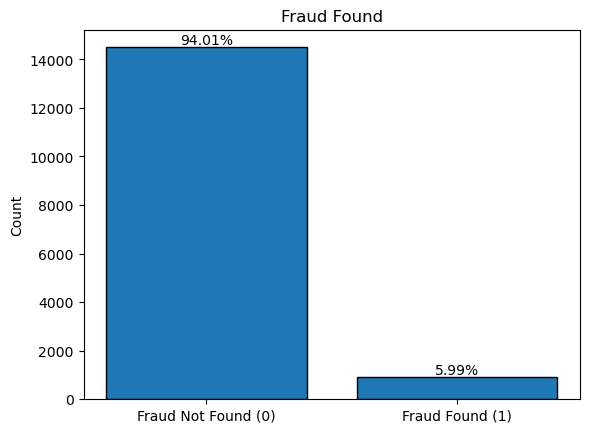

In [ ]:
label = ('Fraud Not Found (0)', 'Fraud Found (1)')
x = [0, 1]  # The x-coordinates of the bars
heights = data.FraudFound_P.value_counts()

plt.title('Fraud Found')
plt.bar(
    x,
    heights,
    edgecolor='k',
)
plt.xticks(x, label)
plt.ylabel('Count')

# Calculate and show the percentage values
total = sum(heights)
for i, v in enumerate(heights):
    percent = v/total * 100
    plt.text(i, v, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()


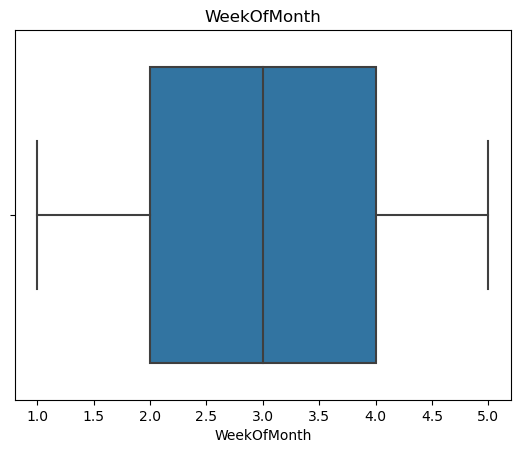

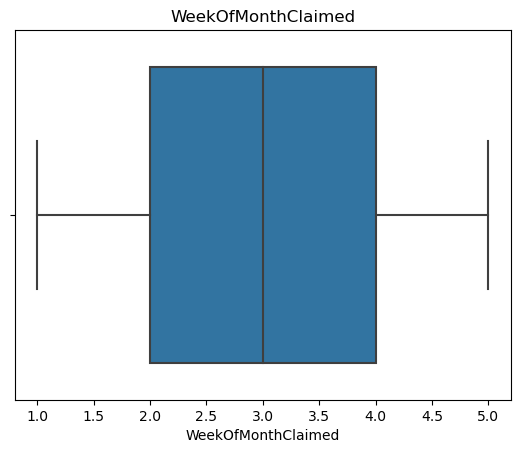

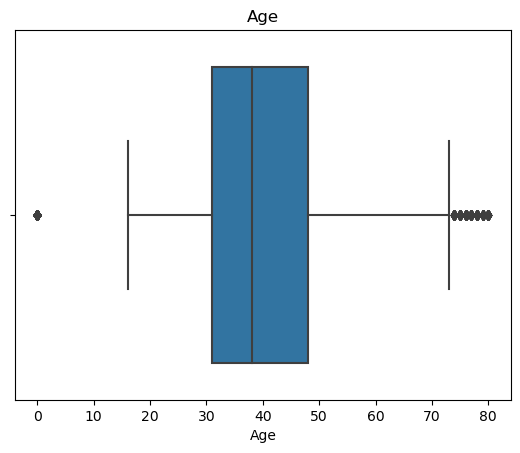

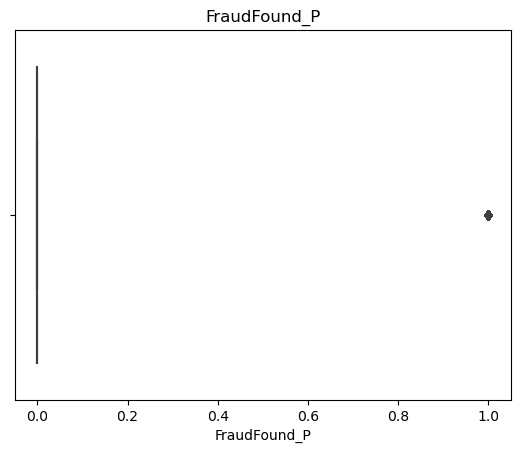

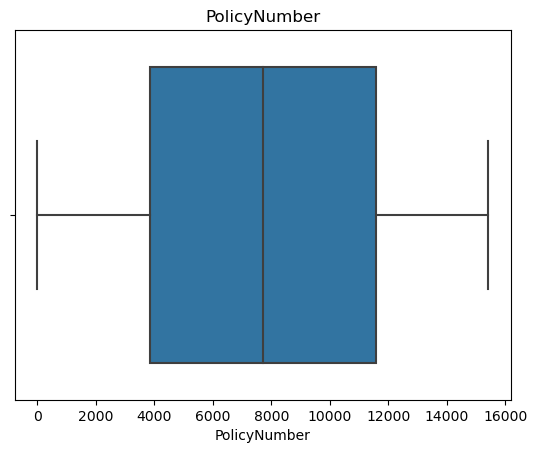

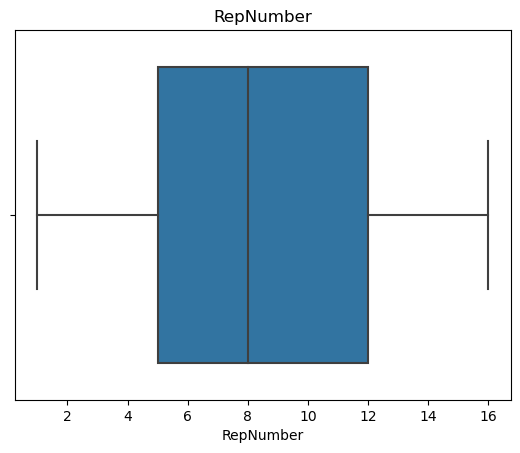

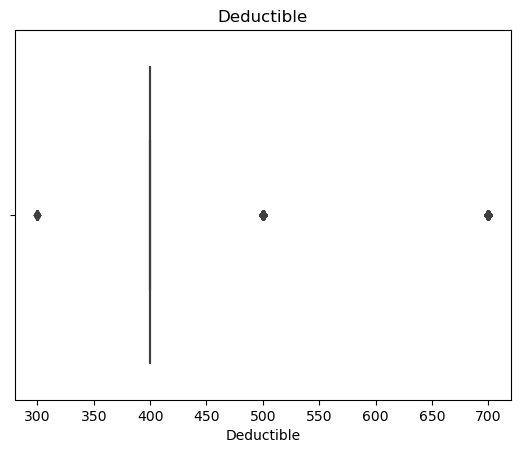

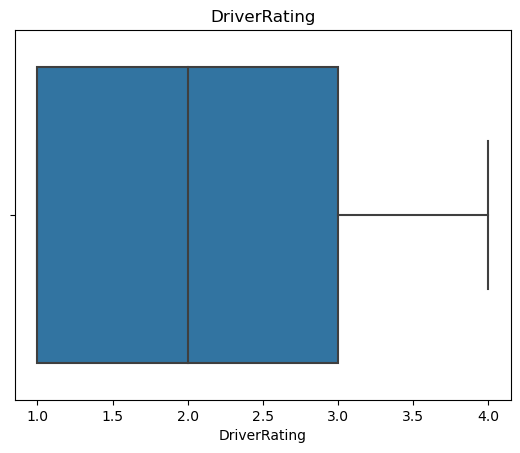

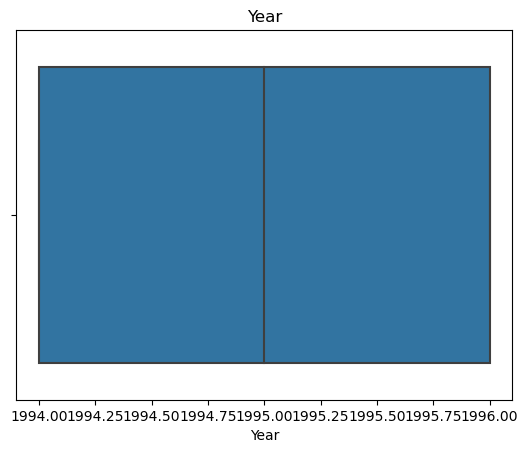

In [ ]:
# Create boxplots for each column
for col in data.columns:
    if data[col].dtype != 'object':  # Only plot numeric columns
        plt.figure()
        sb.boxplot(x=data[col])
        plt.title(col)
        plt.show()

#### Numerical columns within the dataset

In [ ]:
#List of numerical attributes
Numerical = data.select_dtypes(exclude=['object']).columns

In [ ]:
#numbers of numerical attributes
len(data.select_dtypes(exclude='object').columns)
print(Numerical)

Index(['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P',
       'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year'],
      dtype='object')


In [ ]:
#characteristics of 9 numerical columns
data.select_dtypes(exclude=['object']).describe().round(decimals=2)

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,0.06,7710.50,8.48,407.70,2.49,1994.87
std,1.29,1.26,13.49,0.24,4451.51,4.60,43.95,1.12,0.80
min,1.00,1.00,0.00,0.00,1.00,1.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,0.00,3855.75,5.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,0.00,7710.50,8.00,400.00,2.00,1995.00
75%,4.00,4.00,48.00,0.00,11565.25,12.00,400.00,3.00,1996.00
max,5.00,5.00,80.00,1.00,15420.00,16.00,700.00,4.00,1996.00


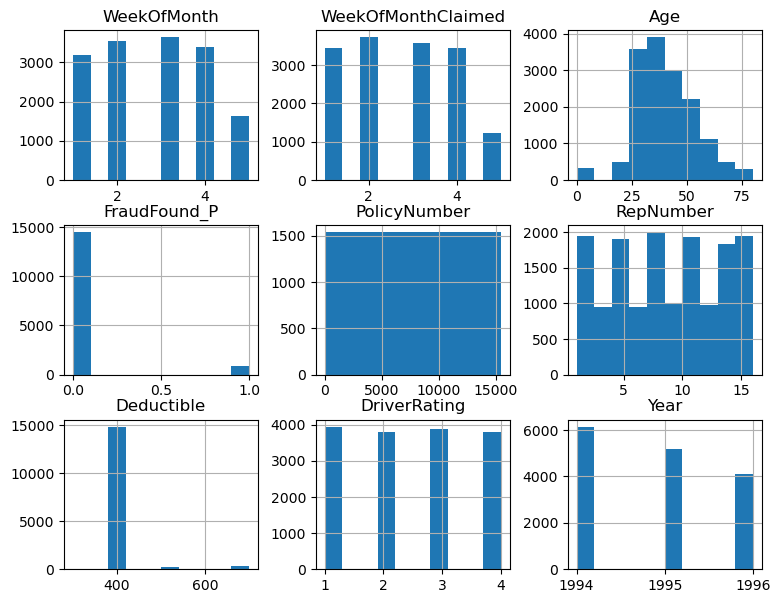

In [ ]:
data[Numerical].hist(figsize=(9,7))
plt.show()

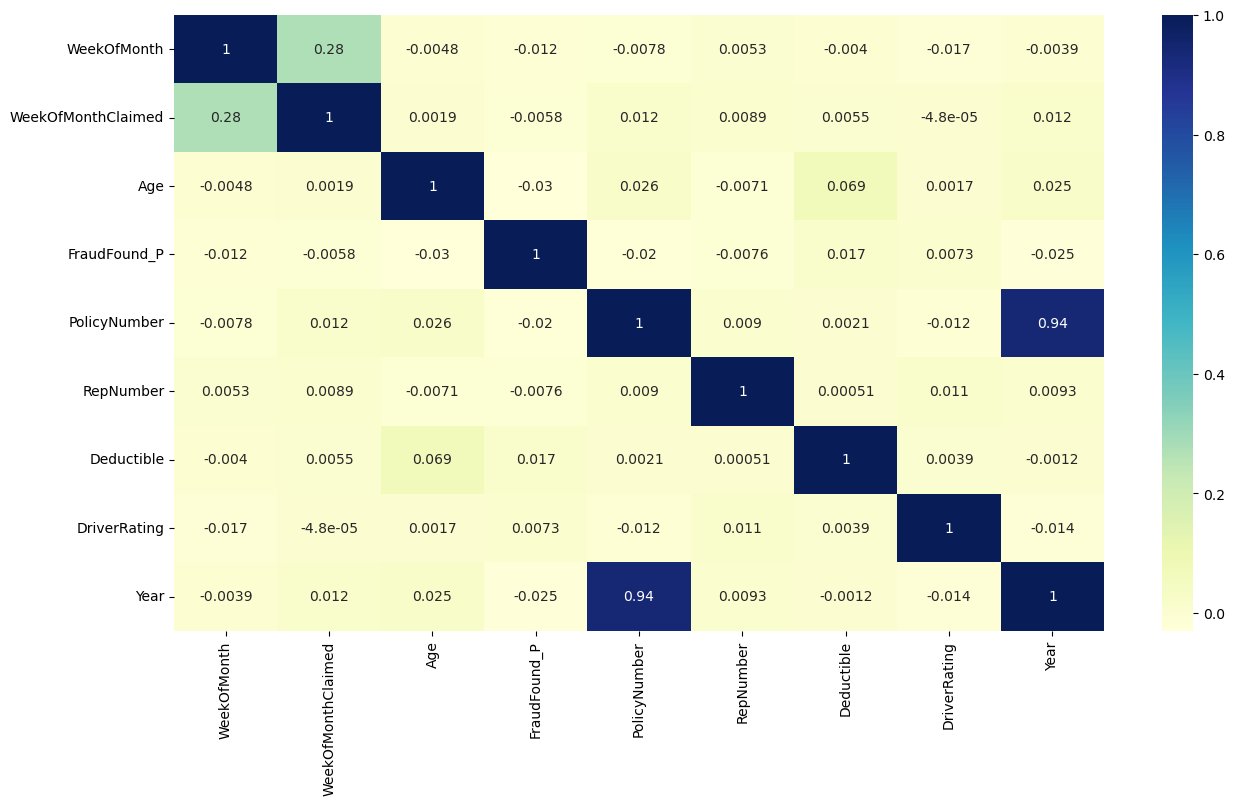

In [ ]:
#Correlation matrix
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
correlations = data.corr(method='pearson')
sb.heatmap(correlations, annot=True, ax=ax, cmap="YlGnBu")
plt.show()

In [ ]:
correlations

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.007797,0.005283,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.011665,0.008908,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.025944,-0.007063,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,-0.020345,-0.007551,0.017348,0.007266,-0.024760
PolicyNumber,-0.007797,0.011665,0.025944,-0.020345,1.000000,0.008990,0.002133,-0.012312,0.936513
RepNumber,0.005283,0.008908,-0.007063,-0.007551,0.008990,1.000000,0.000509,0.011031,0.009338
Deductible,-0.003993,0.005457,0.069420,0.017348,0.002133,0.000509,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,-0.012312,0.011031,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,0.936513,0.009338,-0.001170,-0.013890,1.000000


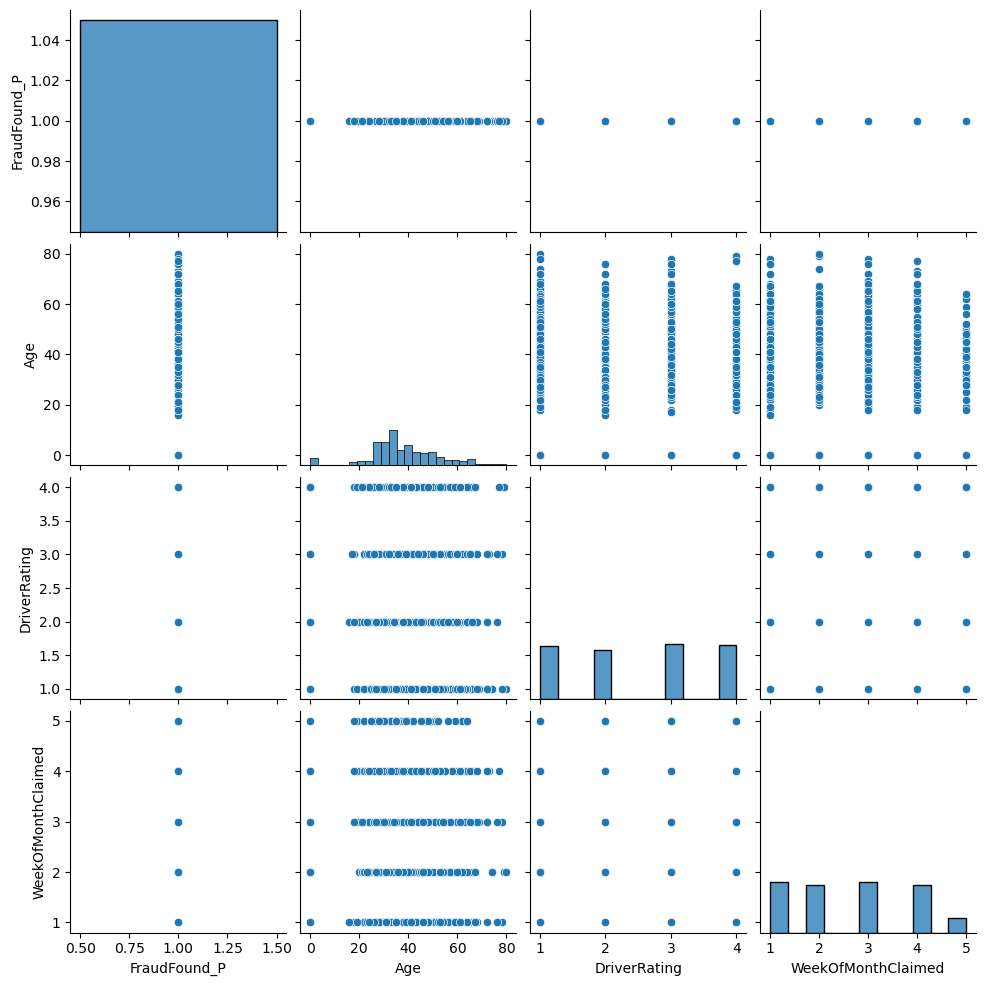

In [ ]:
#Scatter matrix
sb.pairplot(Fraud[['FraudFound_P', 'Age','DriverRating','WeekOfMonthClaimed']])
plt.show()

#### Categorical columns within the dataset

In [ ]:
#List of numerical attributes
Categorical = data.select_dtypes(include=['object']).columns

In [ ]:
len(data.select_dtypes(include='object').columns)

24

In [ ]:
data.select_dtypes(include=['object']).describe().round(decimals=2)

,Month,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,Sex,MaritalStatus,Fault,PolicyType,...,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
count,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420,...,15420,15420,15420,15420,15420,15420,15420,15420,15420,15420
unique,12,7,19,2,8,13,2,4,2,9,...,4,8,9,2,2,2,4,5,5,3
top,Jan,Monday,Pontiac,Urban,Monday,Jan,Male,Married,Policy Holder,Sedan - Collision,...,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
freq,1411,2616,3837,13822,3757,1446,13000,10625,11230,5584,...,5485,5807,5593,14992,15333,15179,7047,14324,14316,5962


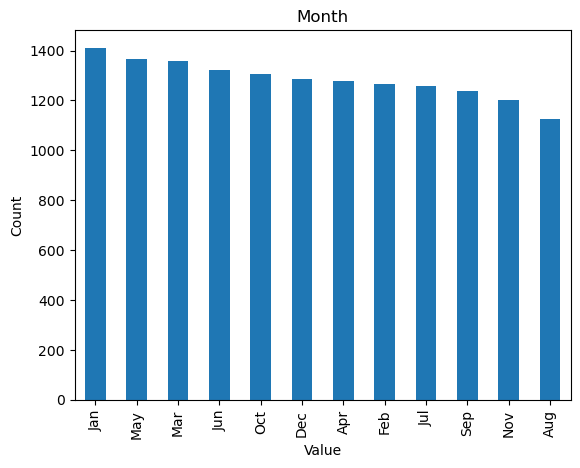

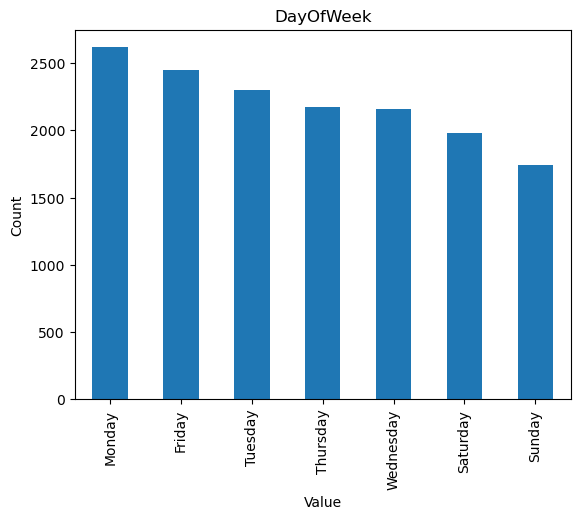

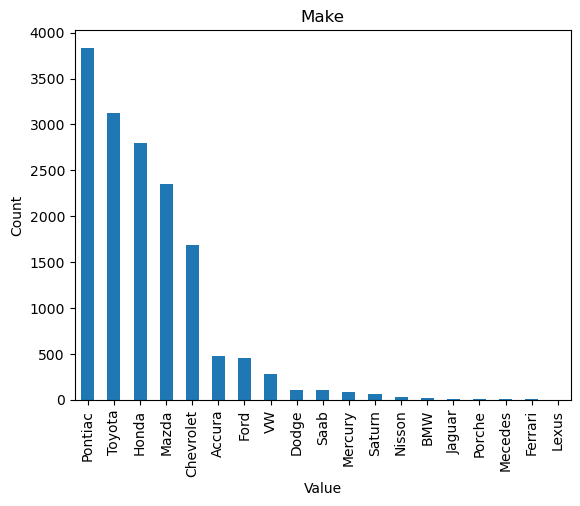

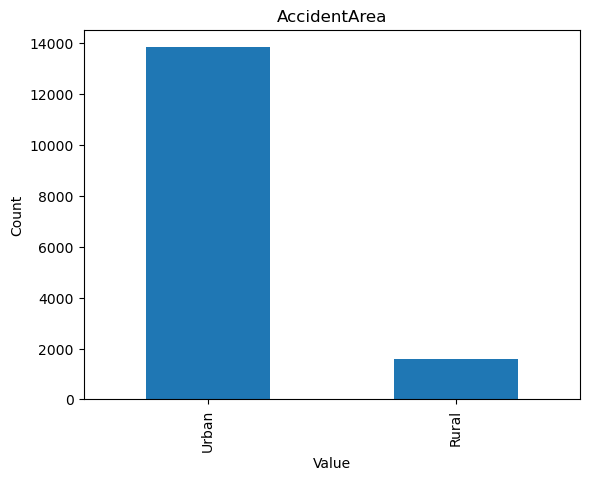

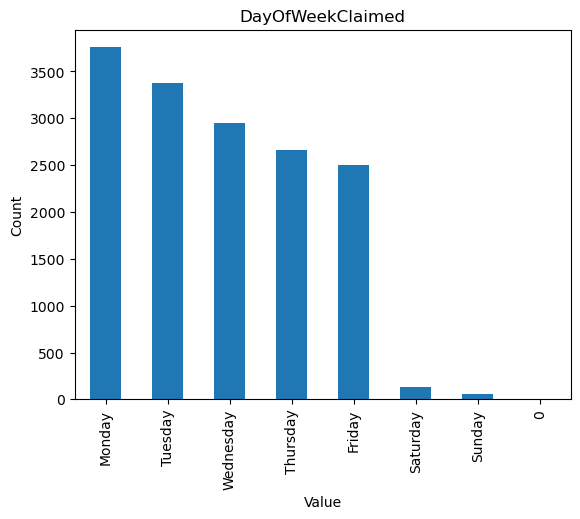

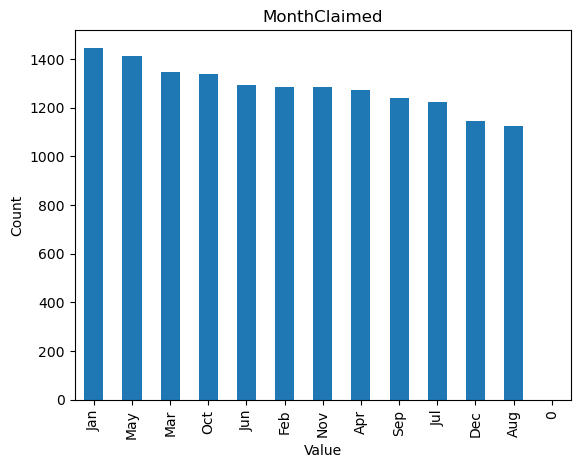

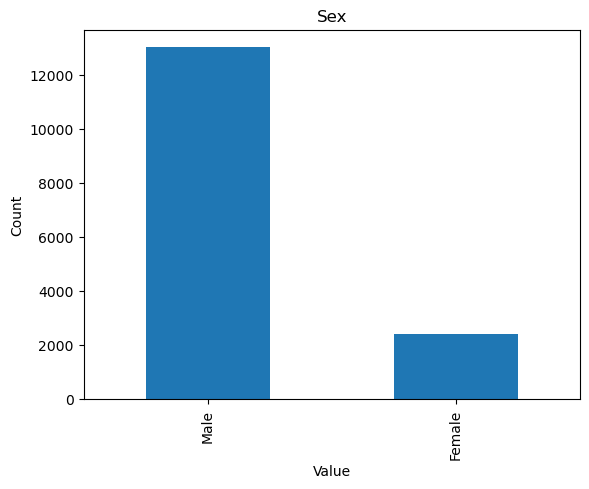

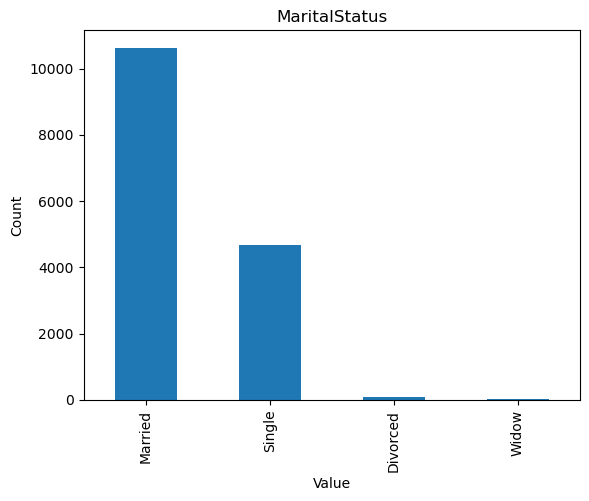

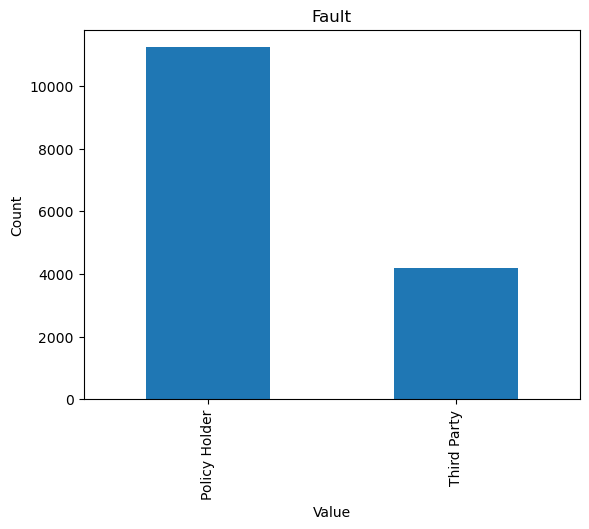

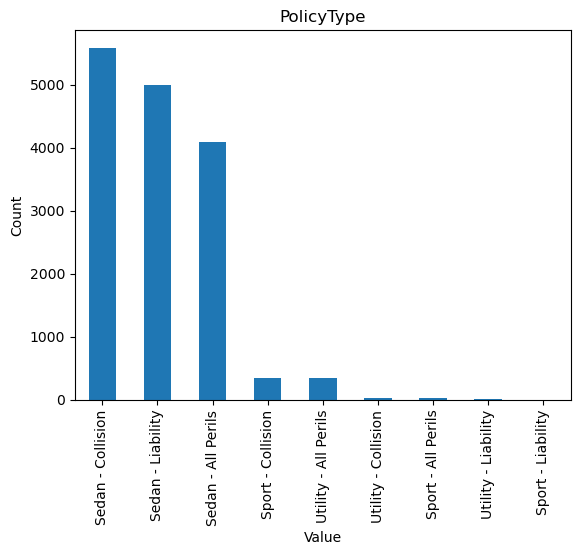

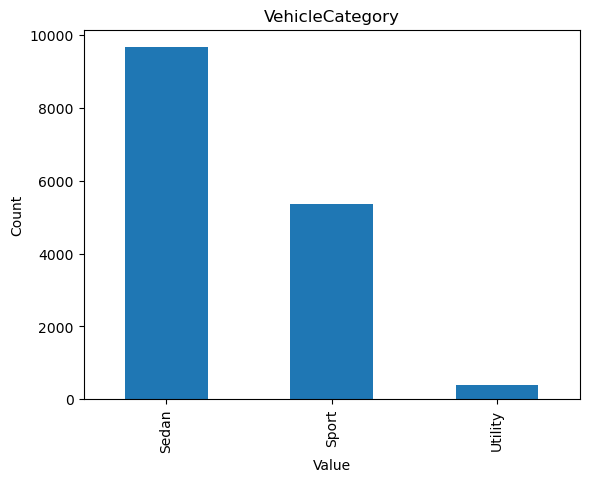

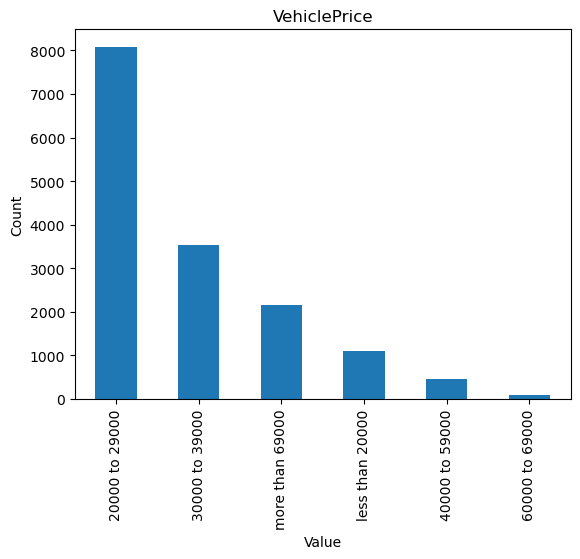

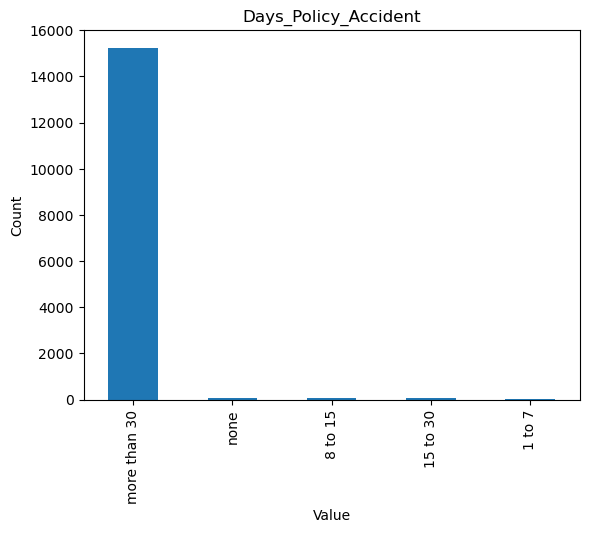

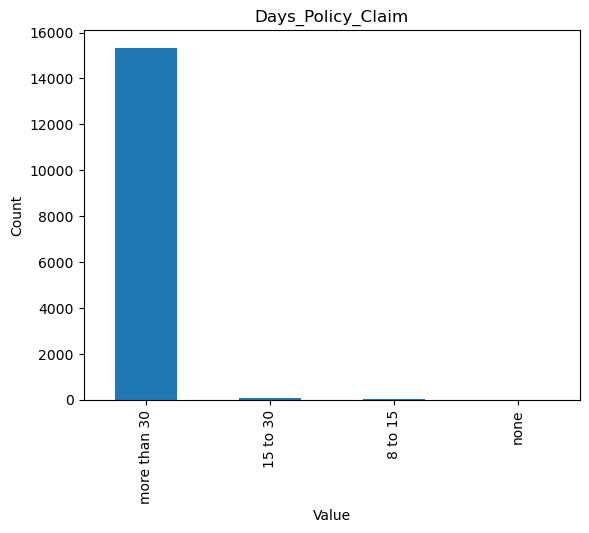

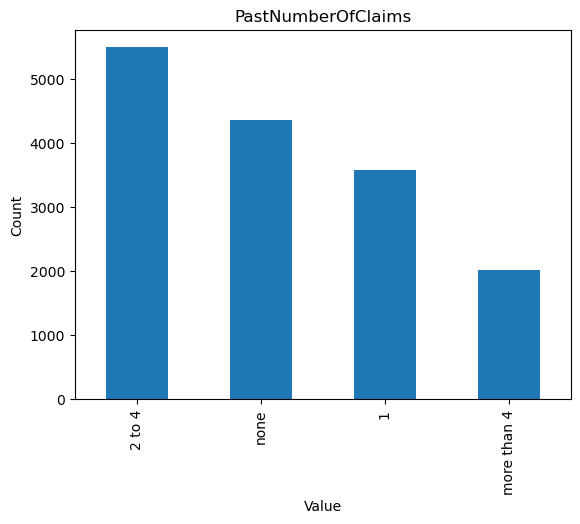

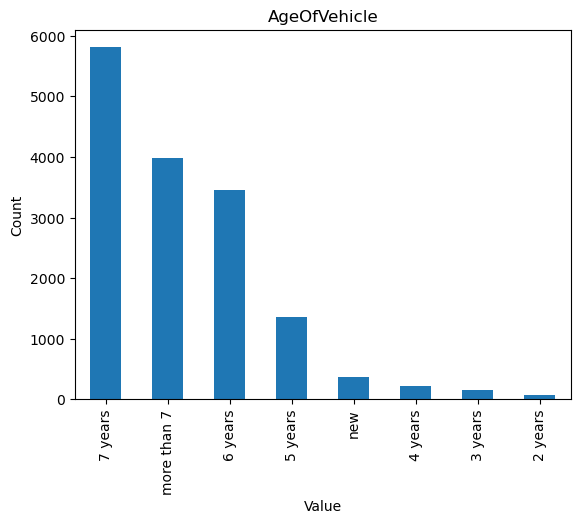

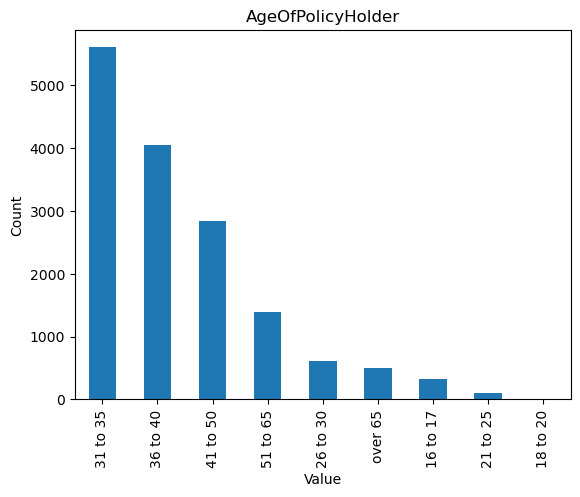

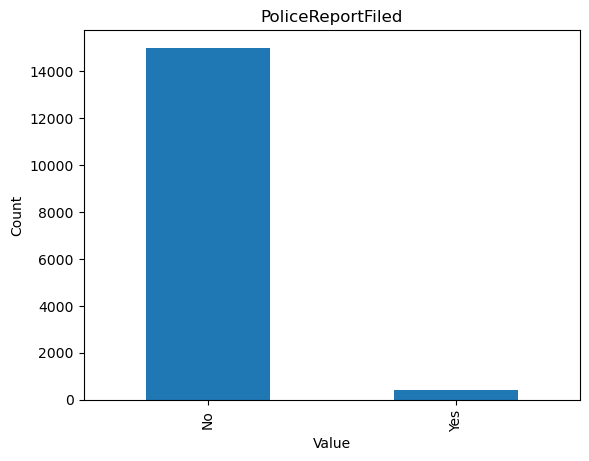

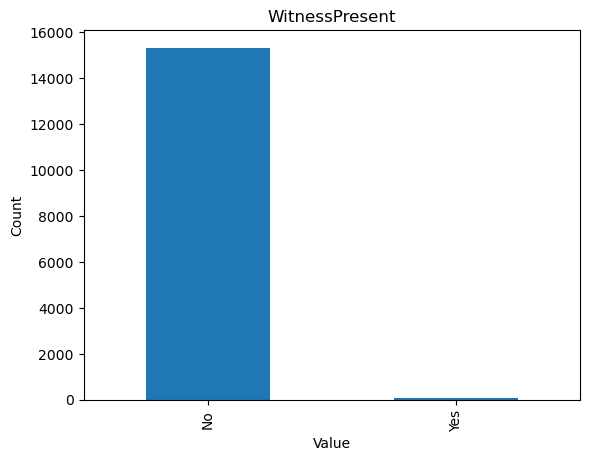

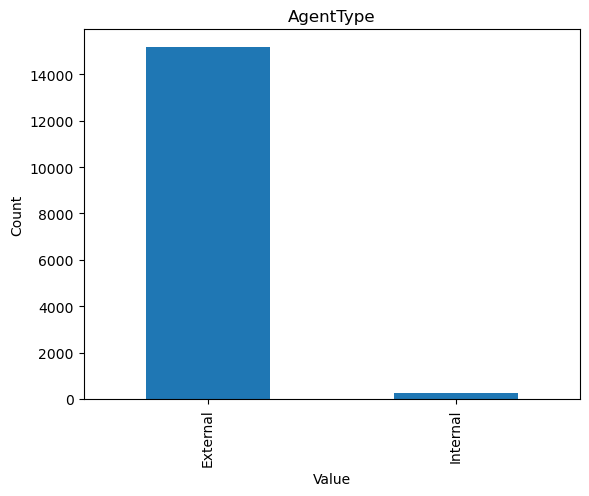

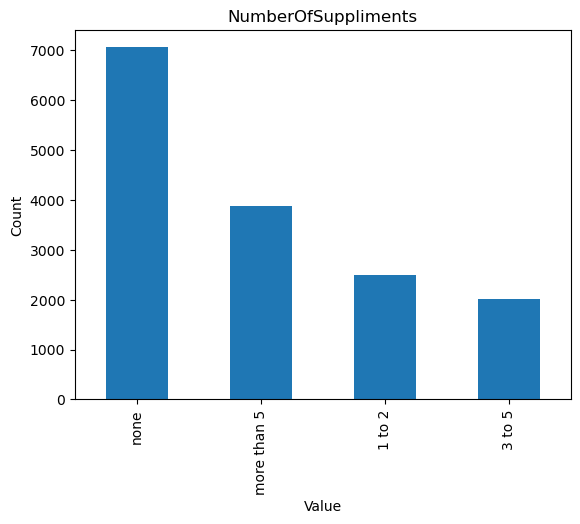

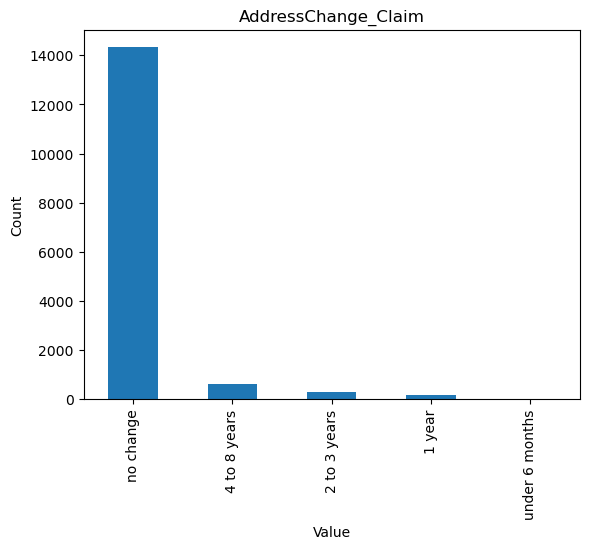

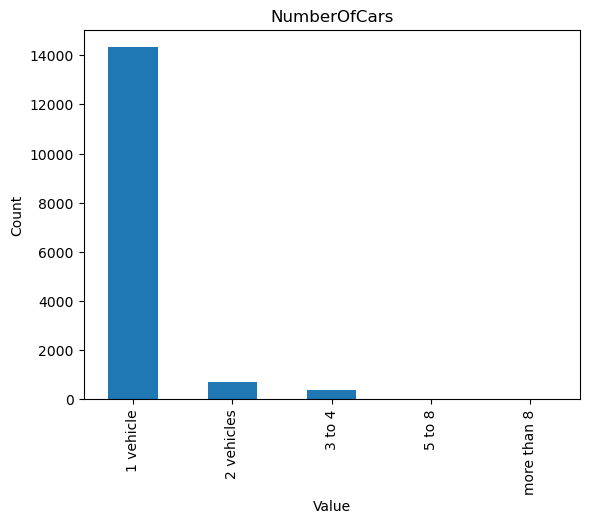

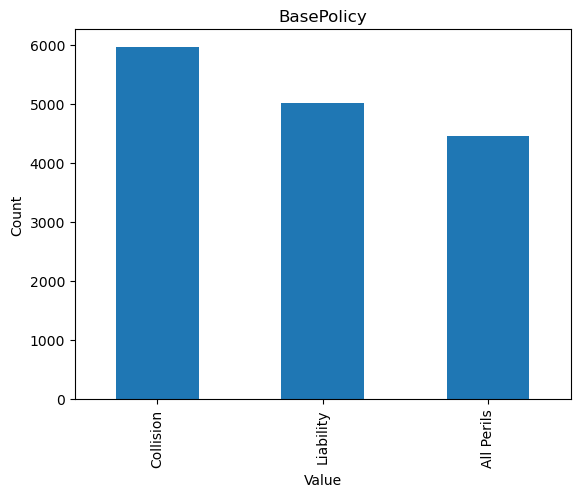

In [ ]:
for col in Categorical:
    plt.figure()
    data[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

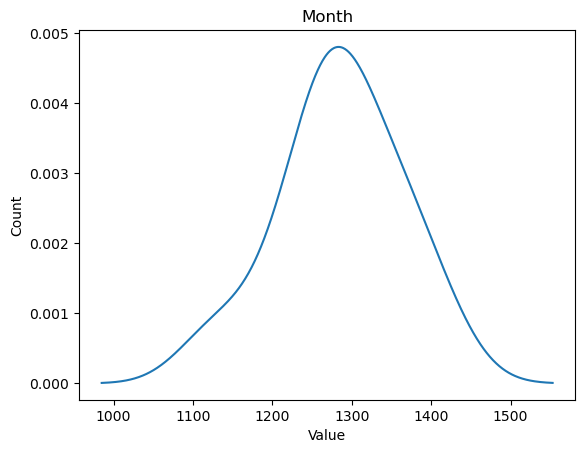

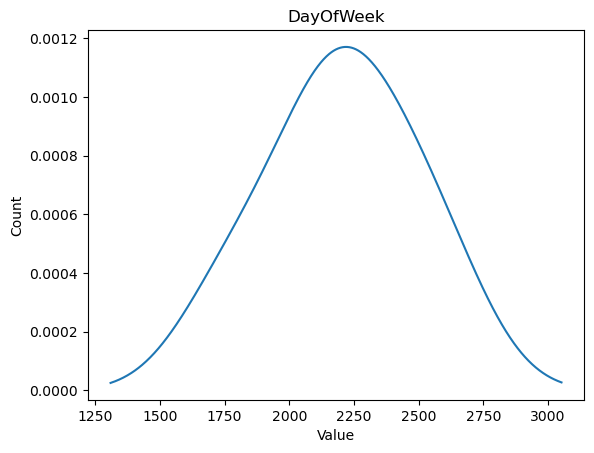

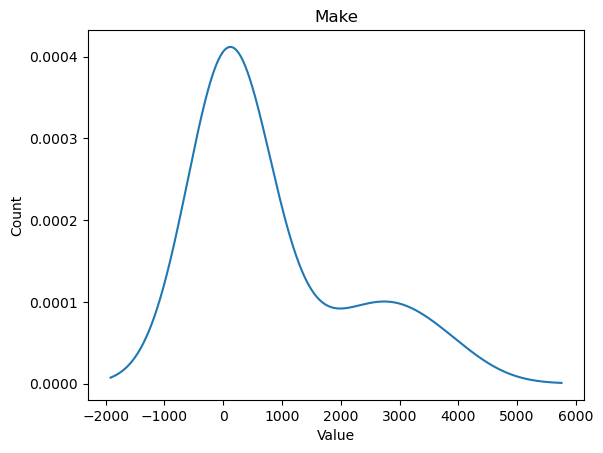

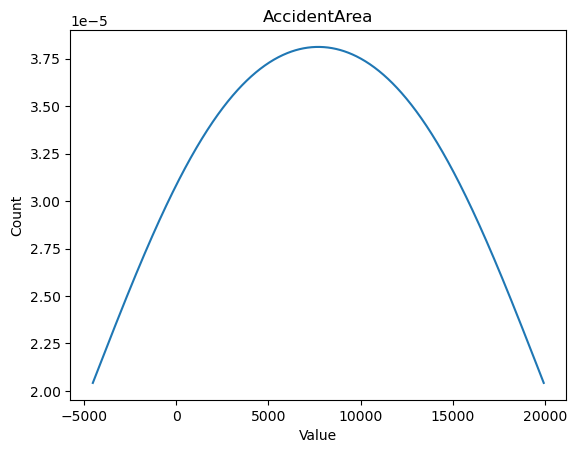

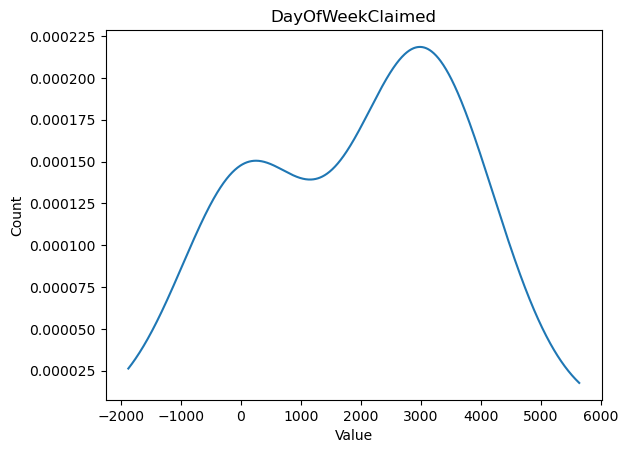

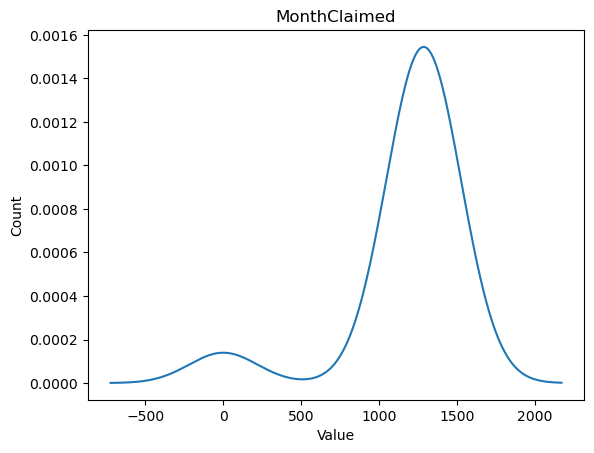

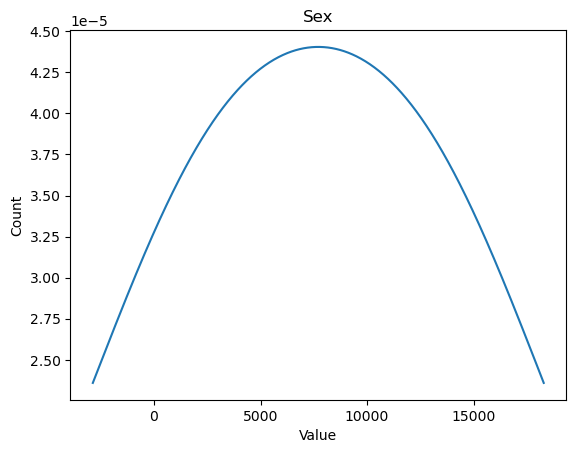

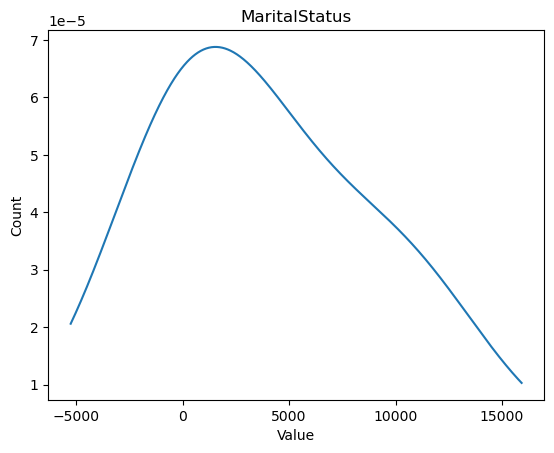

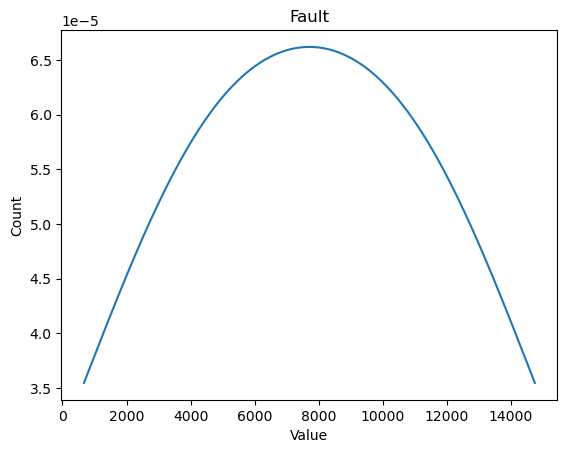

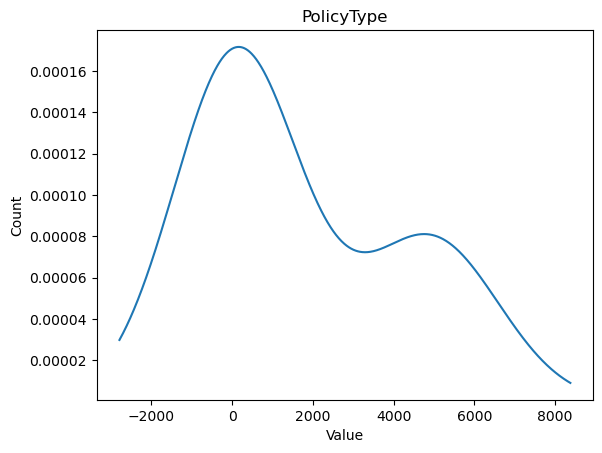

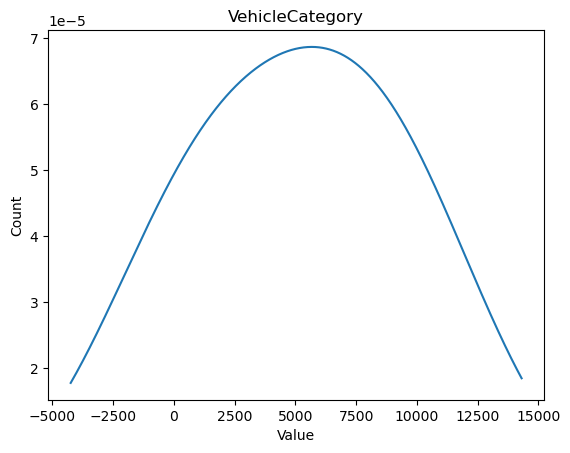

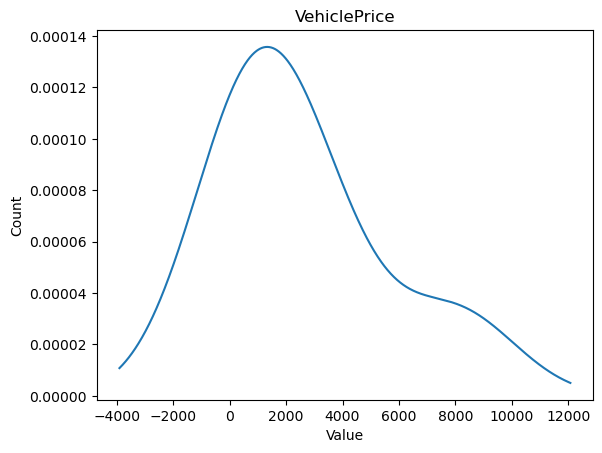

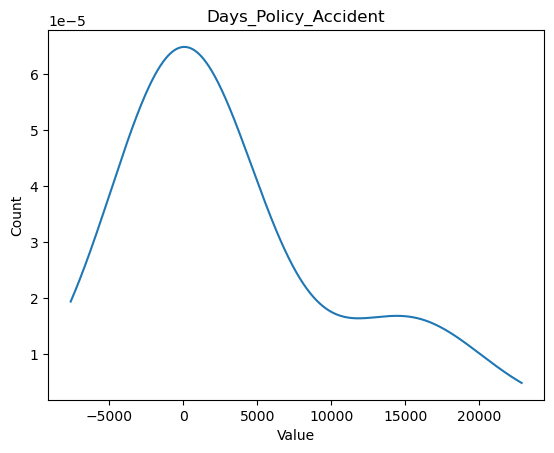

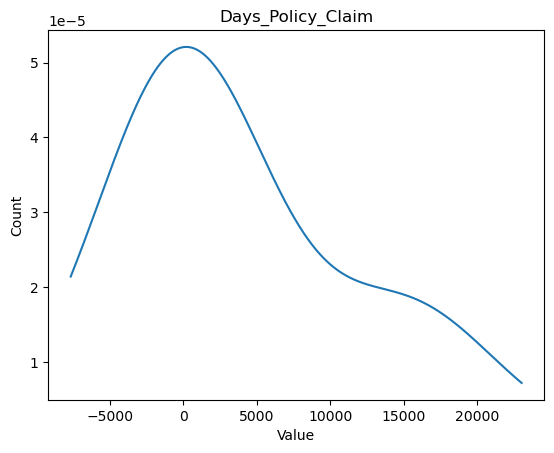

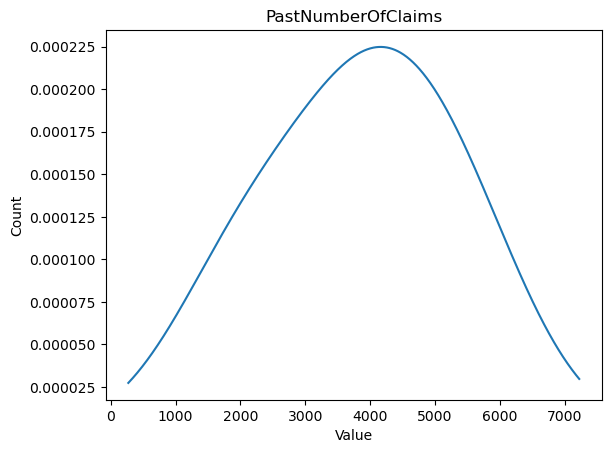

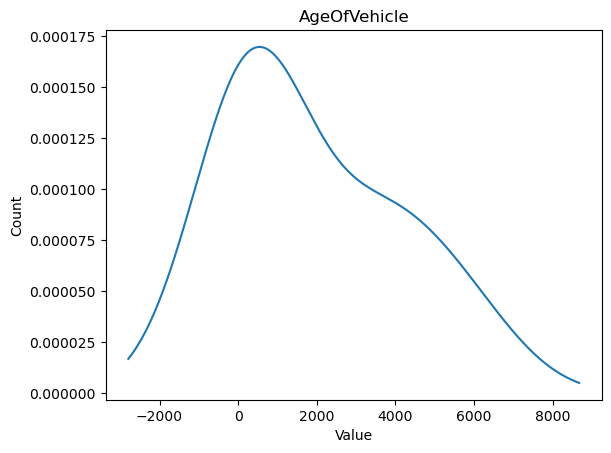

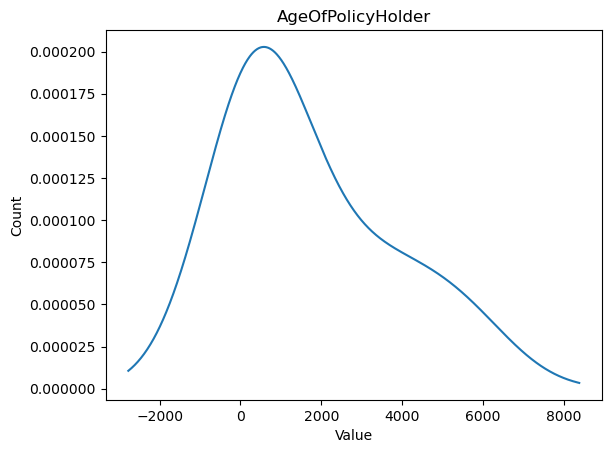

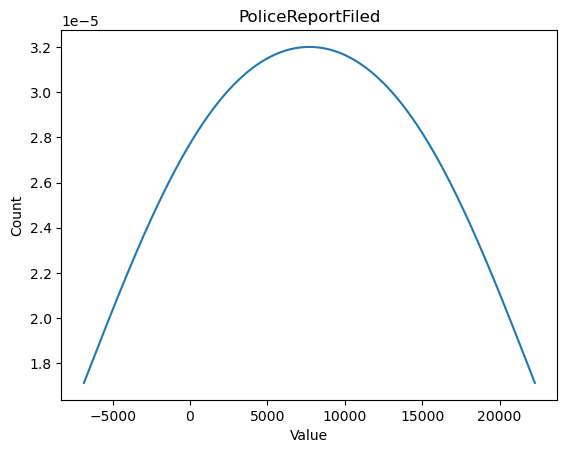

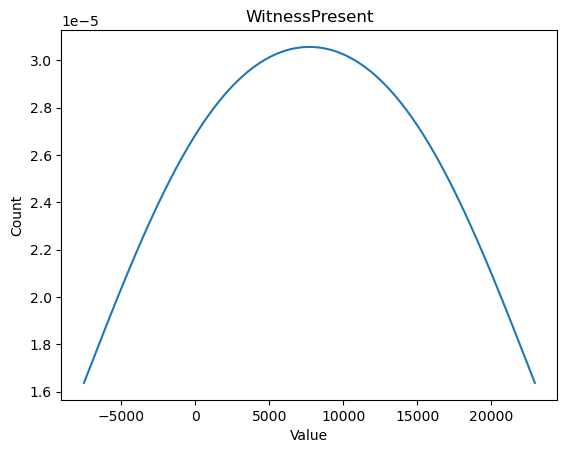

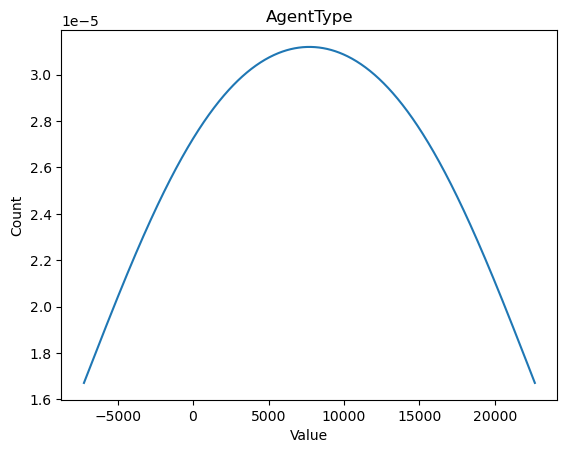

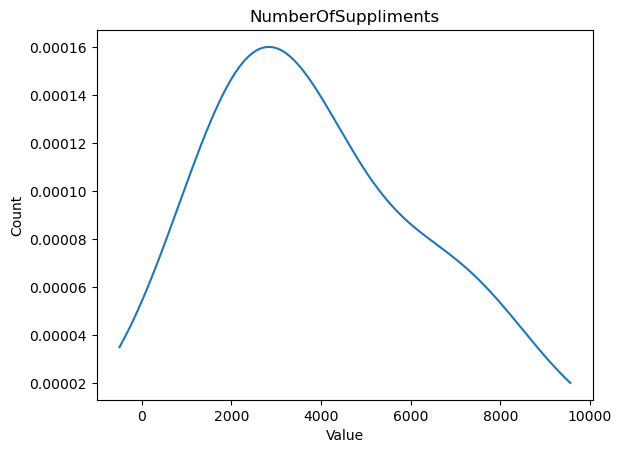

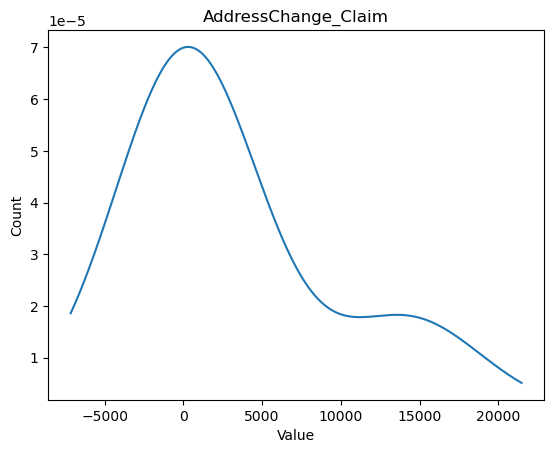

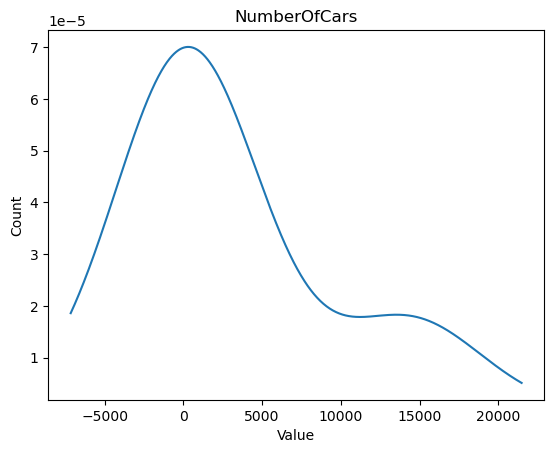

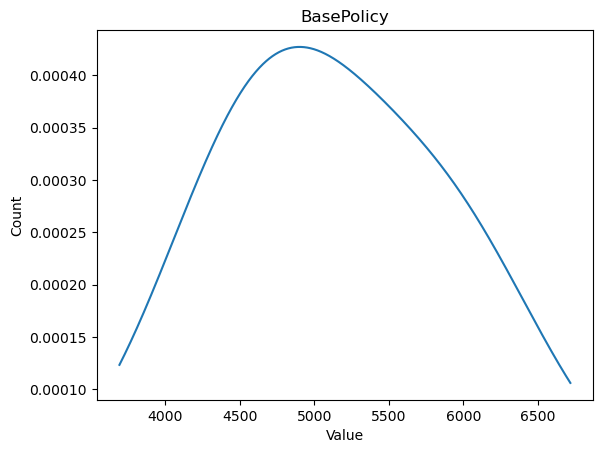

In [ ]:
for col in Categorical:
    plt.figure()
    data[col].value_counts().plot(kind='density')
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.show()

In [ ]:
#Subsetting the dataset: Fraud and NonFraud
Fraud = data[data["FraudFound_P"] == 1]
Nonfraud = data[data["FraudFound_P"] == 0]

In [ ]:
data.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
#Filtering out 8 features applying manual selection
data = data.drop(['PolicyNumber', 'DayOfWeek', 'Month','WeekOfMonth',
                  'AgeOfPolicyHolder', 'Year', 'NumberOfSuppliments', 
                  'AddressChange_Claim'], axis=1)
print(data.shape)

(15420, 25)


(array([ 320.,    0.,  497., 3572., 3895., 3012., 2224., 1111.,  485.,
         304.]),
 array([ 0.,  8., 16., 24., 32., 40., 48., 56., 64., 72., 80.]),
 <BarContainer object of 10 artists>)

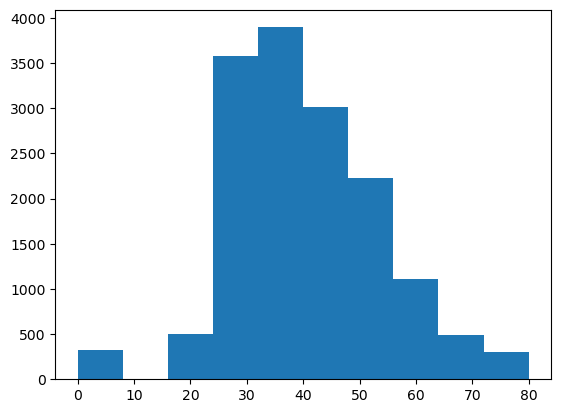

In [ ]:
#Covert Age to category after dropping age under under 18
plt.hist(data['Age'])

In [ ]:
data.loc[data['Age'] < 18]['Age'].value_counts()

0     320
16      9
17      6
Name: Age, dtype: int64

In [ ]:
indicies = data.loc[data['Age'] == 0].index
#print(indicies)
#print(indicies.shape)

In [ ]:
data = data.drop(labels=indicies)
print(data.shape)
#data.head()

(15100, 25)


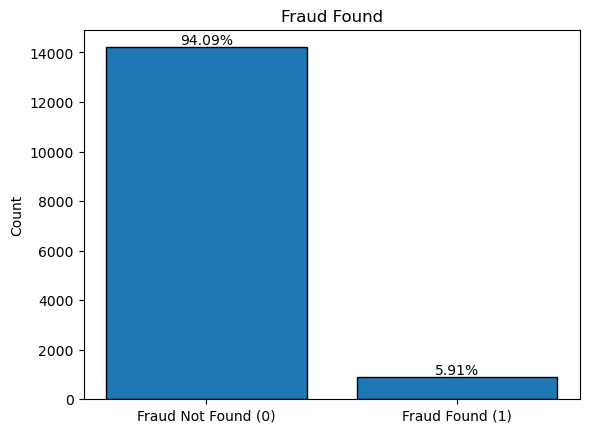

In [ ]:
%matplotlib inline
label = ('Fraud Not Found (0)', 'Fraud Found (1)')
x = [0, 1]  # The x-coordinates of the bars
heights = data.FraudFound_P.value_counts()

plt.title('Fraud Found')
plt.bar(
    x,
    heights,
    edgecolor='k',
)
plt.xticks(x, label)
plt.ylabel('Count')

# Calculate and show the percentage values
total = sum(heights)
for i, v in enumerate(heights):
    percent = v/total * 100
    plt.text(i, v, f"{percent:.2f}%", ha='center', va='bottom')

plt.show()


In [ ]:
AgeLabels = ['16-17','18-20','21-25','26-30','31-35','36-40','41-50','51-65','65-100']

#print(len(AgeLabels))

AgeBins =  [16,18,21,26,31,36,41,51,65,100]

#print(len(AgeBins))

AgeCategories = pd.cut(data['Age'], bins = AgeBins,labels=AgeLabels)

In [ ]:
data['AgeCategories'] = AgeCategories
data.drop(columns=['Age'],axis=1,inplace=True)

data.columns

Index(['Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed',
       'WeekOfMonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'NumberOfCars',
       'BasePolicy', 'AgeCategories'],
      dtype='object')


**Freature Selection**

In [ ]:
#Assign input and output data 
y = data['FraudFound_P']
input_var = [x for x in data.columns if x!='FraudFound_P']
X = data[input_var].astype(str)

In [ ]:
#Split data into training and validation datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (9060, 24) (9060,)
Test (6040, 24) (6040,)


In [ ]:
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

In [ ]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)

Feature 0: 5.977216, Name: Make
Feature 1: 1.246565, Name: AccidentArea
Feature 2: 1.023801, Name: DayOfWeekClaimed
Feature 3: 1.615413, Name: MonthClaimed
Feature 4: 0.799405, Name: WeekOfMonthClaimed
Feature 5: 1.657577, Name: Sex
Feature 6: 0.099326, Name: MaritalStatus
Feature 7: 112.947257, Name: Fault
Feature 8: 40.237777, Name: PolicyType
Feature 9: 71.740590, Name: VehicleCategory
Feature 10: 93.132556, Name: VehiclePrice
Feature 11: 0.075305, Name: RepNumber
Feature 12: 0.594966, Name: Deductible
Feature 13: 1.471831, Name: DriverRating
Feature 14: 0.012558, Name: Days_Policy_Accident
Feature 15: 0.019329, Name: Days_Policy_Claim
Feature 16: 1.179073, Name: PastNumberOfClaims
Feature 17: 2.295835, Name: AgeOfVehicle
Feature 18: 2.520005, Name: PoliceReportFiled
Feature 19: 0.139524, Name: WitnessPresent
Feature 20: 6.286047, Name: AgentType
Feature 21: 1.927466, Name: NumberOfCars
Feature 22: 130.515945, Name: BasePolicy
Feature 23: 4.847505, Name: AgeCategories


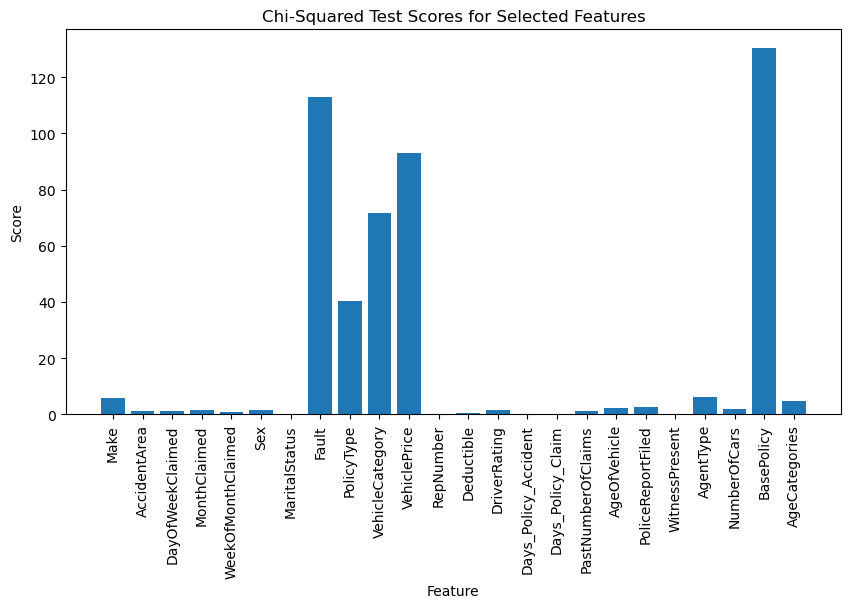

In [ ]:
# get selected features
selected_features = [features[i] for i in range(len(features)) if fs.get_support()[i]]

# print scores and feature names
for i in range(len(fs.scores_)):
    print('Feature %d: %f, Name: %s' % (i, fs.scores_[i], features[i]))

# plot the scores with feature names
plt.figure(figsize=(10, 5))
plt.bar(selected_features, fs.scores_[fs.get_support()])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Score')
plt.title('Chi-Squared Test Scores for Selected Features')
plt.show()


Feature 0: 5.977216
Feature 1: 1.246565
Feature 2: 1.023801
Feature 3: 1.615413
Feature 4: 0.799405
Feature 5: 1.657577
Feature 6: 0.099326
Feature 7: 112.947257
Feature 8: 40.237777
Feature 9: 71.740590
Feature 10: 93.132556
Feature 11: 0.075305
Feature 12: 0.594966
Feature 13: 1.471831
Feature 14: 0.012558
Feature 15: 0.019329
Feature 16: 1.179073
Feature 17: 2.295835
Feature 18: 2.520005
Feature 19: 0.139524
Feature 20: 6.286047
Feature 21: 1.927466
Feature 22: 130.515945
Feature 23: 4.847505


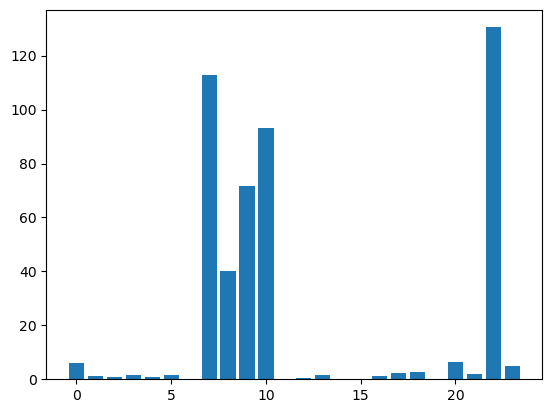

In [ ]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
 
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15100 entries, 0 to 15419
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Make                  15100 non-null  object  
 1   AccidentArea          15100 non-null  object  
 2   DayOfWeekClaimed      15100 non-null  object  
 3   MonthClaimed          15100 non-null  object  
 4   WeekOfMonthClaimed    15100 non-null  int64   
 5   Sex                   15100 non-null  object  
 6   MaritalStatus         15100 non-null  object  
 7   Fault                 15100 non-null  object  
 8   PolicyType            15100 non-null  object  
 9   VehicleCategory       15100 non-null  object  
 10  VehiclePrice          15100 non-null  object  
 11  FraudFound_P          15100 non-null  int64   
 12  RepNumber             15100 non-null  int64   
 13  Deductible            15100 non-null  int64   
 14  DriverRating          15100 non-null  int64   
 15  Da

Best features 5 features : 22: NumberOfCars, 7: Fault, 10: VehiclePrice, 9: VehicleCategory, 8: PolicyType

Addional top 5 features: 20: WitnessPresent, 0: Make, 23: BasePolicy , 18:AgeOfVehicle , 17: PastNumberOfClaims

In [ ]:
 #train model on top 5 and top 10 to learn accuracy
data_top5 = data[['NumberOfCars', 'Fault', 'VehiclePrice', 'VehicleCategory', 
             'PolicyType']] 

data_top10 = data[['NumberOfCars', 'Fault', 'VehiclePrice', 'VehicleCategory', 'PolicyType',
              'WitnessPresent', 'Make', 'BasePolicy' , 'AgeOfVehicle', 'PastNumberOfClaims']]

**Dummies**

In [ ]:
#create dummies 
data_top10 = pd.get_dummies(data_top10, drop_first=True)
for feature in data_top10.columns:
    print(feature)

NumberOfCars_2 vehicles
NumberOfCars_3 to 4
NumberOfCars_5 to 8
NumberOfCars_more than 8
Fault_Third Party
VehiclePrice_30000 to 39000
VehiclePrice_40000 to 59000
VehiclePrice_60000 to 69000
VehiclePrice_less than 20000
VehiclePrice_more than 69000
VehicleCategory_Sport
VehicleCategory_Utility
PolicyType_Sedan - Collision
PolicyType_Sedan - Liability
PolicyType_Sport - All Perils
PolicyType_Sport - Collision
PolicyType_Sport - Liability
PolicyType_Utility - All Perils
PolicyType_Utility - Collision
PolicyType_Utility - Liability
WitnessPresent_Yes
Make_BMW
Make_Chevrolet
Make_Dodge
Make_Ferrari
Make_Ford
Make_Honda
Make_Jaguar
Make_Lexus
Make_Mazda
Make_Mecedes
Make_Mercury
Make_Nisson
Make_Pontiac
Make_Porche
Make_Saab
Make_Saturn
Make_Toyota
Make_VW
BasePolicy_Collision
BasePolicy_Liability
AgeOfVehicle_3 years
AgeOfVehicle_4 years
AgeOfVehicle_5 years
AgeOfVehicle_6 years
AgeOfVehicle_7 years
AgeOfVehicle_more than 7
AgeOfVehicle_new
PastNumberOfClaims_2 to 4
PastNumberOfClaims_more

In [ ]:
data_top10.shape


(15100, 51)

Lets rename our features with white spaces to carry underscores. Example - NumberOfCars_3 to 4 to NumberOfCars_3_to_4.

In [ ]:
data_top10c = data_top10.columns.str.replace(' ', '_')

for feature in data_top10c:
    print(feature)

NumberOfCars_2_vehicles
NumberOfCars_3_to_4
NumberOfCars_5_to_8
NumberOfCars_more_than_8
Fault_Third_Party
VehiclePrice_30000_to_39000
VehiclePrice_40000_to_59000
VehiclePrice_60000_to_69000
VehiclePrice_less_than_20000
VehiclePrice_more_than_69000
VehicleCategory_Sport
VehicleCategory_Utility
PolicyType_Sedan_-_Collision
PolicyType_Sedan_-_Liability
PolicyType_Sport_-_All_Perils
PolicyType_Sport_-_Collision
PolicyType_Sport_-_Liability
PolicyType_Utility_-_All_Perils
PolicyType_Utility_-_Collision
PolicyType_Utility_-_Liability
WitnessPresent_Yes
Make_BMW
Make_Chevrolet
Make_Dodge
Make_Ferrari
Make_Ford
Make_Honda
Make_Jaguar
Make_Lexus
Make_Mazda
Make_Mecedes
Make_Mercury
Make_Nisson
Make_Pontiac
Make_Porche
Make_Saab
Make_Saturn
Make_Toyota
Make_VW
BasePolicy_Collision
BasePolicy_Liability
AgeOfVehicle_3_years
AgeOfVehicle_4_years
AgeOfVehicle_5_years
AgeOfVehicle_6_years
AgeOfVehicle_7_years
AgeOfVehicle_more_than_7
AgeOfVehicle_new
PastNumberOfClaims_2_to_4
PastNumberOfClaims_more

In [ ]:
data_top10.isna().sum()

NumberOfCars_2 vehicles            0
NumberOfCars_3 to 4                0
NumberOfCars_5 to 8                0
NumberOfCars_more than 8           0
Fault_Third Party                  0
VehiclePrice_30000 to 39000        0
VehiclePrice_40000 to 59000        0
VehiclePrice_60000 to 69000        0
VehiclePrice_less than 20000       0
VehiclePrice_more than 69000       0
VehicleCategory_Sport              0
VehicleCategory_Utility            0
PolicyType_Sedan - Collision       0
PolicyType_Sedan - Liability       0
PolicyType_Sport - All Perils      0
PolicyType_Sport - Collision       0
PolicyType_Sport - Liability       0
PolicyType_Utility - All Perils    0
PolicyType_Utility - Collision     0
PolicyType_Utility - Liability     0
WitnessPresent_Yes                 0
Make_BMW                           0
Make_Chevrolet                     0
Make_Dodge                         0
Make_Ferrari                       0
Make_Ford                          0
Make_Honda                         0
M

In [ ]:
cleaned_data = data_top10.rename(columns=lambda x: x.strip().replace(' ', '_'))
# Print column names side by side
print(f"{'Original DataFrame':<25} {'Cleaned DataFrame':<25}")
print('-' * 50)
for col1, col2 in zip(data.columns, cleaned_data.columns):
    print(f"{col1:<25} {col2:<25}")


Original DataFrame        Cleaned DataFrame        
--------------------------------------------------
Make                      NumberOfCars_2_vehicles  
AccidentArea              NumberOfCars_3_to_4      
DayOfWeekClaimed          NumberOfCars_5_to_8      
MonthClaimed              NumberOfCars_more_than_8 
WeekOfMonthClaimed        Fault_Third_Party        
Sex                       VehiclePrice_30000_to_39000
MaritalStatus             VehiclePrice_40000_to_59000
Fault                     VehiclePrice_60000_to_69000
PolicyType                VehiclePrice_less_than_20000
VehicleCategory           VehiclePrice_more_than_69000
VehiclePrice              VehicleCategory_Sport    
FraudFound_P              VehicleCategory_Utility  
RepNumber                 PolicyType_Sedan_-_Collision
Deductible                PolicyType_Sedan_-_Liability
DriverRating              PolicyType_Sport_-_All_Perils
Days_Policy_Accident      PolicyType_Sport_-_Collision
Days_Policy_Claim         PolicyType_Spo